<a href="https://colab.research.google.com/github/riteshkatekar/-UNEMPLOYEMENT-ANALYSIS-WITH-PYTHON/blob/main/Unemployment_In_India.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
#import libraries

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import plotly.express as px
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")
import plotly.figure_factory as ff
import plotly.graph_objects as go
import matplotlib as mlp
%matplotlib inline

In [ ]:
# Define the file paths
df_filepath = "/content/sample_data/Unemployment in India.xlsx"
ir_filepath = "/content/sample_data/Unemployment_Rate_upto_11_2020.xlsx"

# Read the Excel files
df = pd.read_excel(df_filepath)
ir = pd.read_excel(ir_filepath)




In [ ]:
df

,Region,Date,Frequency,Estimated Unemployment Rate (%),Estimated Employed,Estimated Labour Participation Rate (%),Area
0,Andhra Pradesh,31-05-2019,Monthly,3.65,11999139.0,43.24,Rural
1,Andhra Pradesh,30-06-2019,Monthly,3.05,11755881.0,42.05,Rural
2,Andhra Pradesh,31-07-2019,Monthly,3.75,12086707.0,43.50,Rural
3,Andhra Pradesh,31-08-2019,Monthly,3.32,12285693.0,43.97,Rural
4,Andhra Pradesh,30-09-2019,Monthly,5.17,12256762.0,44.68,Rural
...,...,...,...,...,...,...,...
749,West Bengal,29-02-2020,Monthly,7.55,10871168.0,44.09,Urban
750,West Bengal,31-03-2020,Monthly,6.67,10806105.0,43.34,Urban
751,West Bengal,30-04-2020,Monthly,15.63,9299466.0,41.20,Urban
752,West Bengal,31-05-2020,Monthly,15.22,9240903.0,40.67,Urban


In [ ]:
# from above we get to knoe that we have missing values
df.isna().sum()

Region                                     14
Date                                       14
Frequency                                  14
Estimated Unemployment Rate (%)            14
Estimated Employed                         14
Estimated Labour Participation Rate (%)    14
Area                                       14
dtype: int64

In [ ]:
# those columns and rows are empty drop it now
df.dropna(inplace= True)

In [ ]:
df.isna().sum()

Region                                     0
Date                                       0
Frequency                                  0
Estimated Unemployment Rate (%)            0
Estimated Employed                         0
Estimated Labour Participation Rate (%)    0
Area                                       0
dtype: int64

In [ ]:
# checking the duplicates present in the data set
df.duplicated().sum()

0

In [ ]:
df.tail()

,Region,Date,Frequency,Estimated Unemployment Rate (%),Estimated Employed,Estimated Labour Participation Rate (%),Area
749,West Bengal,29-02-2020,Monthly,7.55,10871168.0,44.09,Urban
750,West Bengal,31-03-2020,Monthly,6.67,10806105.0,43.34,Urban
751,West Bengal,30-04-2020,Monthly,15.63,9299466.0,41.20,Urban
752,West Bengal,31-05-2020,Monthly,15.22,9240903.0,40.67,Urban
753,West Bengal,30-06-2020,Monthly,9.86,9088931.0,37.57,Urban


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 740 entries, 0 to 753
Data columns (total 7 columns):
 #   Column                                   Non-Null Count  Dtype  
---  ------                                   --------------  -----  
 0   Region                                   740 non-null    object 
 1   Date                                     740 non-null    object 
 2   Frequency                                740 non-null    object 
 3   Estimated Unemployment Rate (%)          740 non-null    float64
 4   Estimated Employed                       740 non-null    float64
 5   Estimated Labour Participation Rate (%)  740 non-null    float64
 6   Area                                     740 non-null    object 
dtypes: float64(3), object(4)
memory usage: 46.2+ KB


In [ ]:
df.describe()

,Estimated Unemployment Rate (%),Estimated Employed,Estimated Labour Participation Rate (%)
count,740.000000,7.400000e+02,740.000000
mean,11.787946,7.204460e+06,42.630122
std,10.721298,8.087988e+06,8.111094
min,0.000000,4.942000e+04,13.330000
25%,4.657500,1.190404e+06,38.062500
50%,8.350000,4.744178e+06,41.160000
75%,15.887500,1.127549e+07,45.505000
max,76.740000,4.577751e+07,72.570000


In [ ]:
df

,Region,Date,Frequency,Estimated Unemployment Rate (%),Estimated Employed,Estimated Labour Participation Rate (%),Area
0,Andhra Pradesh,31-05-2019,Monthly,3.65,11999139.0,43.24,Rural
1,Andhra Pradesh,30-06-2019,Monthly,3.05,11755881.0,42.05,Rural
2,Andhra Pradesh,31-07-2019,Monthly,3.75,12086707.0,43.50,Rural
3,Andhra Pradesh,31-08-2019,Monthly,3.32,12285693.0,43.97,Rural
4,Andhra Pradesh,30-09-2019,Monthly,5.17,12256762.0,44.68,Rural
...,...,...,...,...,...,...,...
749,West Bengal,29-02-2020,Monthly,7.55,10871168.0,44.09,Urban
750,West Bengal,31-03-2020,Monthly,6.67,10806105.0,43.34,Urban
751,West Bengal,30-04-2020,Monthly,15.63,9299466.0,41.20,Urban
752,West Bengal,31-05-2020,Monthly,15.22,9240903.0,40.67,Urban


In [ ]:
#changing the columns names for our convinience

df.columns=("States","Date","Frequency","Estimated Unemployment Rate","Estimated Employed","Estimated Labour Participation Rate","Area")

In [ ]:
df

,States,Date,Frequency,Estimated Unemployment Rate,Estimated Employed,Estimated Labour Participation Rate,Area
0,Andhra Pradesh,31-05-2019,Monthly,3.65,11999139.0,43.24,Rural
1,Andhra Pradesh,30-06-2019,Monthly,3.05,11755881.0,42.05,Rural
2,Andhra Pradesh,31-07-2019,Monthly,3.75,12086707.0,43.50,Rural
3,Andhra Pradesh,31-08-2019,Monthly,3.32,12285693.0,43.97,Rural
4,Andhra Pradesh,30-09-2019,Monthly,5.17,12256762.0,44.68,Rural
...,...,...,...,...,...,...,...
749,West Bengal,29-02-2020,Monthly,7.55,10871168.0,44.09,Urban
750,West Bengal,31-03-2020,Monthly,6.67,10806105.0,43.34,Urban
751,West Bengal,30-04-2020,Monthly,15.63,9299466.0,41.20,Urban
752,West Bengal,31-05-2020,Monthly,15.22,9240903.0,40.67,Urban


## **Analysis of 2nd Data set i.e. ds_2020**

In [ ]:
ir.head()

,Region,Date,Frequency,Estimated Unemployment Rate (%),Estimated Employed,Estimated Labour Participation Rate (%),Region.1,Longitude,Latitude
0,Andhra Pradesh,31-01-2020,M,5.48,16635535,41.02,South,15.9129,79.74
1,Andhra Pradesh,29-02-2020,M,5.83,16545652,40.90,South,15.9129,79.74
2,Andhra Pradesh,31-03-2020,M,5.79,15881197,39.18,South,15.9129,79.74
3,Andhra Pradesh,30-04-2020,M,20.51,11336911,33.10,South,15.9129,79.74
4,Andhra Pradesh,31-05-2020,M,17.43,12988845,36.46,South,15.9129,79.74


In [ ]:
#changing the columns names for our convinience
ir.columns=["States","Date","Frequency","Estimated Unemployment Rate","Estimated Employed","Estimated Labour Participation Rate","Region", "Longitude", "Latitude"]

In [ ]:
ir

,States,Date,Frequency,Estimated Unemployment Rate,Estimated Employed,Estimated Labour Participation Rate,Region,Longitude,Latitude
0,Andhra Pradesh,31-01-2020,M,5.48,16635535,41.02,South,15.9129,79.740
1,Andhra Pradesh,29-02-2020,M,5.83,16545652,40.90,South,15.9129,79.740
2,Andhra Pradesh,31-03-2020,M,5.79,15881197,39.18,South,15.9129,79.740
3,Andhra Pradesh,30-04-2020,M,20.51,11336911,33.10,South,15.9129,79.740
4,Andhra Pradesh,31-05-2020,M,17.43,12988845,36.46,South,15.9129,79.740
...,...,...,...,...,...,...,...,...,...
262,West Bengal,30-06-2020,M,7.29,30726310,40.39,East,22.9868,87.855
263,West Bengal,31-07-2020,M,6.83,35372506,46.17,East,22.9868,87.855
264,West Bengal,31-08-2020,M,14.87,33298644,47.48,East,22.9868,87.855
265,West Bengal,30-09-2020,M,9.35,35707239,47.73,East,22.9868,87.855


In [ ]:
ir.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 267 entries, 0 to 266
Data columns (total 9 columns):
 #   Column                               Non-Null Count  Dtype  
---  ------                               --------------  -----  
 0   States                               267 non-null    object 
 1   Date                                 267 non-null    object 
 2   Frequency                            267 non-null    object 
 3   Estimated Unemployment Rate          267 non-null    float64
 4   Estimated Employed                   267 non-null    int64  
 5   Estimated Labour Participation Rate  267 non-null    float64
 6   Region                               267 non-null    object 
 7   Longitude                            267 non-null    float64
 8   Latitude                             267 non-null    float64
dtypes: float64(4), int64(1), object(4)
memory usage: 18.9+ KB


In [ ]:
ir.duplicated().sum()

0

In [ ]:
ir.describe()

,Estimated Unemployment Rate,Estimated Employed,Estimated Labour Participation Rate,Longitude,Latitude
count,267.000000,2.670000e+02,267.000000,267.000000,267.000000
mean,12.236929,1.396211e+07,41.681573,22.826048,80.532425
std,10.803283,1.336632e+07,7.845419,6.270731,5.831738
min,0.500000,1.175420e+05,16.770000,10.850500,71.192400
25%,4.845000,2.838930e+06,37.265000,18.112400,76.085600
50%,9.650000,9.732417e+06,40.390000,23.610200,79.019300
75%,16.755000,2.187869e+07,44.055000,27.278400,85.279900
max,75.850000,5.943376e+07,69.690000,33.778200,92.937600


In [ ]:
ir['States'].value_counts().idxmin()

'Sikkim'

In [ ]:
print(df['States'].value_counts().idxmax())
ir['States'].value_counts().idxmax()

Andhra Pradesh


'Andhra Pradesh'

In [ ]:
df['States'].value_counts().idxmin()

'Chandigarh'

In [ ]:
print(df.shape)
ir.info

(740, 7)


<bound method DataFrame.info of              States        Date Frequency  Estimated Unemployment Rate  \
0    Andhra Pradesh  31-01-2020         M                         5.48   
1    Andhra Pradesh  29-02-2020         M                         5.83   
2    Andhra Pradesh  31-03-2020         M                         5.79   
3    Andhra Pradesh  30-04-2020         M                        20.51   
4    Andhra Pradesh  31-05-2020         M                        17.43   
..              ...         ...       ...                          ...   
262     West Bengal  30-06-2020         M                         7.29   
263     West Bengal  31-07-2020         M                         6.83   
264     West Bengal  31-08-2020         M                        14.87   
265     West Bengal  30-09-2020         M                         9.35   
266     West Bengal  31-10-2020         M                         9.98   

     Estimated Employed  Estimated Labour Participation Rate Region  \
0              16635535                                41.02  South   
1              16545652                                40.90  South   
2              15881197                                39.18  South   
3              11336911                                33.10  South   
4              12988845                                36.46  South   
..                  ...                                  ...    ...   
262            30726310                                40.39   East   
263            35372506                                46.17   East   
264            33298644                                47.48   East   
265            35707239                                47.73   East   
266            33962549                                45.63   East   

     Longitude  Latitude  
0      15.9129    79.740  
1      15.9129    79.740  
2      15.9129    79.740  
3      15.9129    79.740  
4      15.9129    79.740  
..         ...       ...  
262    22.9868    87.855  
263    22.9868    87.855  
264    22.9868    87.855  
265    22.9868    87.855  
266    22.9868    87.855  

[267 rows x 9 columns]>

In [ ]:
import datetime as dt
import calendar  # Correct module name

# Convert the 'Date' column to datetime
ir['Date'] = pd.to_datetime(ir['Date'], dayfirst=True)

# Extract the month number
ir['month_no'] = ir['Date'].dt.month

# Convert the month number to the abbreviated month name
ir['month'] = ir['month_no'].apply(lambda x: calendar.month_abbr[x])



ir.head()

,States,Date,Frequency,Estimated Unemployment Rate,Estimated Employed,Estimated Labour Participation Rate,Region,Longitude,Latitude,month_no,month
0,Andhra Pradesh,2020-01-31,M,5.48,16635535,41.02,South,15.9129,79.74,1,Jan
1,Andhra Pradesh,2020-02-29,M,5.83,16545652,40.90,South,15.9129,79.74,2,Feb
2,Andhra Pradesh,2020-03-31,M,5.79,15881197,39.18,South,15.9129,79.74,3,Mar
3,Andhra Pradesh,2020-04-30,M,20.51,11336911,33.10,South,15.9129,79.74,4,Apr
4,Andhra Pradesh,2020-05-31,M,17.43,12988845,36.46,South,15.9129,79.74,5,May


In [ ]:
ir.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 267 entries, 0 to 266
Data columns (total 11 columns):
 #   Column                               Non-Null Count  Dtype         
---  ------                               --------------  -----         
 0   States                               267 non-null    object        
 1   Date                                 267 non-null    datetime64[ns]
 2   Frequency                            267 non-null    object        
 3   Estimated Unemployment Rate          267 non-null    float64       
 4   Estimated Employed                   267 non-null    int64         
 5   Estimated Labour Participation Rate  267 non-null    float64       
 6   Region                               267 non-null    object        
 7   Longitude                            267 non-null    float64       
 8   Latitude                             267 non-null    float64       
 9   month_no                             267 non-null    int32         
 10  month         

In [ ]:
import datetime as dt
import calendar

# Convert the 'Date' column to datetime
df['Date'] = pd.to_datetime(df['Date'], dayfirst=True)

# Extract the month number
df['month_no'] = df['Date'].dt.month

# Convert the month number to the abbreviated month name
df['month'] = df['Date'].dt.month.apply(lambda y: calendar.month_abbr[y])

df.head()



,States,Date,Frequency,Estimated Unemployment Rate,Estimated Employed,Estimated Labour Participation Rate,Area,month_no,month
0,Andhra Pradesh,2019-05-31,Monthly,3.65,11999139.0,43.24,Rural,5,May
1,Andhra Pradesh,2019-06-30,Monthly,3.05,11755881.0,42.05,Rural,6,Jun
2,Andhra Pradesh,2019-07-31,Monthly,3.75,12086707.0,43.50,Rural,7,Jul
3,Andhra Pradesh,2019-08-31,Monthly,3.32,12285693.0,43.97,Rural,8,Aug
4,Andhra Pradesh,2019-09-30,Monthly,5.17,12256762.0,44.68,Rural,9,Sep


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 740 entries, 0 to 753
Data columns (total 9 columns):
 #   Column                               Non-Null Count  Dtype         
---  ------                               --------------  -----         
 0   States                               740 non-null    object        
 1   Date                                 740 non-null    datetime64[ns]
 2   Frequency                            740 non-null    object        
 3   Estimated Unemployment Rate          740 non-null    float64       
 4   Estimated Employed                   740 non-null    float64       
 5   Estimated Labour Participation Rate  740 non-null    float64       
 6   Area                                 740 non-null    object        
 7   month_no                             740 non-null    int32         
 8   month                                740 non-null    object        
dtypes: datetime64[ns](1), float64(3), int32(1), object(4)
memory usage: 71.1+ KB


In [ ]:
# Find the month with the maximum and minimum occurrences
max_month = df["month"].value_counts().idxmax()
min_month = df["month"].value_counts().idxmin()

print("Maximum:", max_month)
print("Minimum:", min_month)


Maximum: May
Minimum: Apr


In [ ]:
# Find the month with the maximum and minimum occurrences
max_month = ir["month"].value_counts().idxmax()
min_month = ir["month"].value_counts().idxmin()

print("Maximum:", max_month)
print("Minimum:", min_month)


Maximum: Mar
Minimum: Jan


In [ ]:
#Removing unwanted columns
df.drop(columns=["Frequency","month_no"])


,States,Date,Estimated Unemployment Rate,Estimated Employed,Estimated Labour Participation Rate,Area,month
0,Andhra Pradesh,2019-05-31,3.65,11999139.0,43.24,Rural,May
1,Andhra Pradesh,2019-06-30,3.05,11755881.0,42.05,Rural,Jun
2,Andhra Pradesh,2019-07-31,3.75,12086707.0,43.50,Rural,Jul
3,Andhra Pradesh,2019-08-31,3.32,12285693.0,43.97,Rural,Aug
4,Andhra Pradesh,2019-09-30,5.17,12256762.0,44.68,Rural,Sep
...,...,...,...,...,...,...,...
749,West Bengal,2020-02-29,7.55,10871168.0,44.09,Urban,Feb
750,West Bengal,2020-03-31,6.67,10806105.0,43.34,Urban,Mar
751,West Bengal,2020-04-30,15.63,9299466.0,41.20,Urban,Apr
752,West Bengal,2020-05-31,15.22,9240903.0,40.67,Urban,May


In [ ]:
#Removing unwanted columns
ir.drop(columns=["Frequency","month_no"])


,States,Date,Estimated Unemployment Rate,Estimated Employed,Estimated Labour Participation Rate,Region,Longitude,Latitude,month
0,Andhra Pradesh,2020-01-31,5.48,16635535,41.02,South,15.9129,79.740,Jan
1,Andhra Pradesh,2020-02-29,5.83,16545652,40.90,South,15.9129,79.740,Feb
2,Andhra Pradesh,2020-03-31,5.79,15881197,39.18,South,15.9129,79.740,Mar
3,Andhra Pradesh,2020-04-30,20.51,11336911,33.10,South,15.9129,79.740,Apr
4,Andhra Pradesh,2020-05-31,17.43,12988845,36.46,South,15.9129,79.740,May
...,...,...,...,...,...,...,...,...,...
262,West Bengal,2020-06-30,7.29,30726310,40.39,East,22.9868,87.855,Jun
263,West Bengal,2020-07-31,6.83,35372506,46.17,East,22.9868,87.855,Jul
264,West Bengal,2020-08-31,14.87,33298644,47.48,East,22.9868,87.855,Aug
265,West Bengal,2020-09-30,9.35,35707239,47.73,East,22.9868,87.855,Sep


In [ ]:
# Sort the dataframe by 'Estimated Unemployment Rate' in descending order
top_states= df.sort_values(by="Estimated Unemployment Rate", ascending=False)

#Keep only the columns 'States' and 'Estimated Unemployment Rate' and remove duplicate states
top_states=  top_states[['States','Estimated Unemployment Rate']].drop_duplicates(subset='States')

# Take the top 10 states with the highest unemployment rate
top_10_states = top_states.head(10)

#Reset the index to make the output more readable
top_10_states.reset_index(drop=True, inplace=True)

from IPython.display import display, HTML

# Display the result
top_10_states[['States','Estimated Unemployment Rate']]

,States,Estimated Unemployment Rate
0,Puducherry,76.74
1,Jharkhand,70.17
2,Bihar,58.77
3,Tamil Nadu,53.19
4,Himachal Pradesh,50.00
5,Haryana,46.89
6,Delhi,45.78
7,Tripura,43.64
8,Punjab,40.59
9,Madhya Pradesh,40.49


In [ ]:
# Sort the dataframe by 'Estimated Unemployment Rate' in descending order
top_states= ir.sort_values(by="Estimated Unemployment Rate", ascending=False)

#Keep only the columns 'States' and 'Estimated Unemployment Rate' and remove duplicate states
top_states=  top_states[['States','Estimated Unemployment Rate']].drop_duplicates(subset='States')

# Take the top 10 states with the highest unemployment rate
top_10_states = top_states.head(10)

#Reset the index to make the output more readable
top_10_states.reset_index(drop=True, inplace=True)

from IPython.display import display, HTML

# Display the result
top_10_states[['States','Estimated Unemployment Rate']]

,States,Estimated Unemployment Rate
0,Puducherry,75.85
1,Jharkhand,59.23
2,Tamil Nadu,49.83
3,Bihar,46.64
4,Haryana,43.22
5,Delhi,42.27
6,Tripura,41.23
7,Karnataka,29.84
8,Punjab,28.33
9,Himachal Pradesh,26.95


In [ ]:
df_1 = df[['States', 'Estimated Unemployment Rate']].groupby('States').sum().sort_values('Estimated Unemployment Rate')
ir_1 = ir[['States', 'Estimated Unemployment Rate']].groupby('States').sum().sort_values('Estimated Unemployment Rate')

In [ ]:
df_1.head(10)

,Estimated Unemployment Rate
States,
Sikkim,123.24
Meghalaya,129.57
Odisha,158.42
Assam,167.13
Uttarakhand,177.74
Gujarat,186.59
Karnataka,186.93
Chandigarh,191.90
Madhya Pradesh,207.38


In [ ]:
ir_1.head(10)

,Estimated Unemployment Rate
States,
Meghalaya,38.66
Assam,48.56
Gujarat,63.76
Odisha,64.62
Telangana,68.33
Madhya Pradesh,68.54
Karnataka,76.68
Chhattisgarh,78.19
Sikkim,78.34


In [ ]:
df_2 = df[['month', 'Estimated Unemployment Rate']].groupby('month').sum().sort_values('Estimated Unemployment Rate')
ir_2 = ir[['month', 'Estimated Unemployment Rate']].groupby('month').sum().sort_values('Estimated Unemployment Rate')

In [ ]:
df_2

,Estimated Unemployment Rate
month,
Sep,470.69
Jul,487.83
Dec,503.36
Aug,510.81
Jan,527.39
Feb,528.13
Nov,542.76
Oct,544.55
Mar,556.43


In [ ]:
ir_2

,Estimated Unemployment Rate
month,
Oct,216.71
Sep,235.06
Jan,239.11
Feb,240.92
Jul,265.53
Aug,278.46
Mar,291.13
Jun,294.60
Apr,578.14


In [ ]:

ir_3 = ir[['month', 'Estimated Employed']].groupby('month').sum().sort_values('Estimated Employed')
df_3 = df[['month', 'Estimated Employed']].groupby('month').sum().sort_values('Estimated Employed')

In [ ]:
ir_3

,Estimated Employed
month,
Apr,274825174
May,310699661
Jun,374149633
Jul,389286580
Aug,389584135
Mar,392543817
Oct,393659474
Sep,393871643
Feb,402694917


In [ ]:
df_3

,Estimated Employed
month,
Apr,269449315.0
Mar,390862219.0
Dec,391001555.0
Aug,399610205.0
Jul,399838967.0
Nov,400051335.0
Oct,401411032.0
Sep,402452126.0
Feb,403011803.0


# **Data** **Visualization**

Text(0, 0.5, 'No. of people Unemployed %')

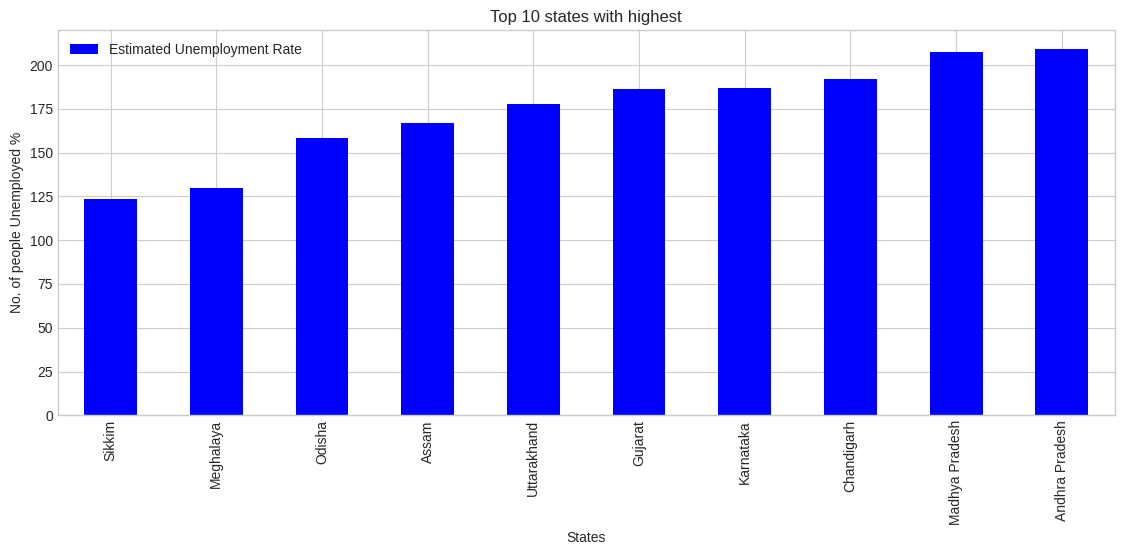

In [ ]:
fig= plt.figure()
g= fig.add_subplot(1,2,1)
df_1[:10].plot(kind='bar',color='blue', figsize=(30,5), ax=g)
g.set_title('Top 10 states with highest')
g.set_xlabel('States')
g.set_ylabel("No. of people Unemployed %")

Text(0, 0.5, 'No. of people Unemployed %')

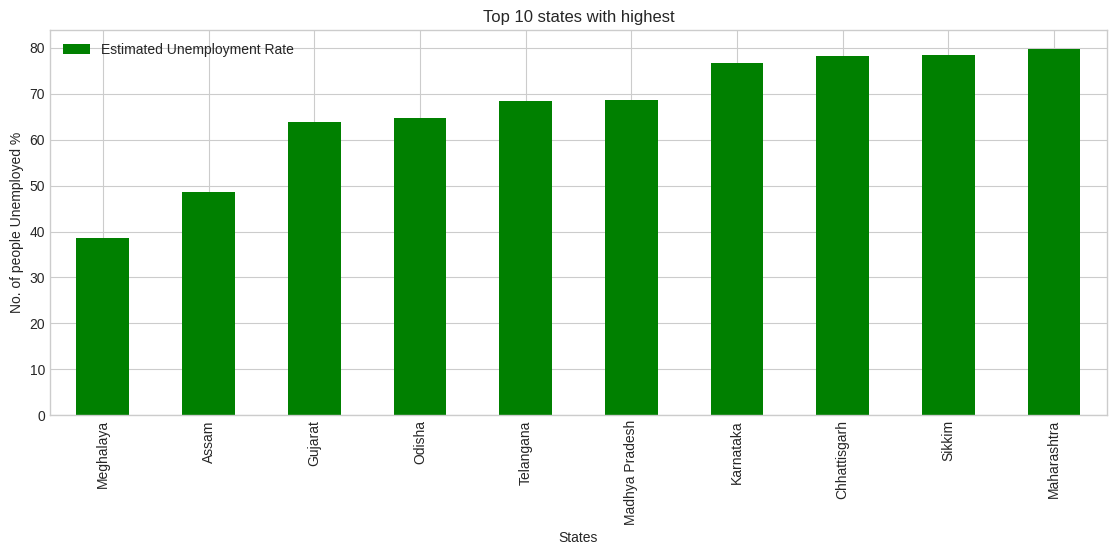

In [ ]:
fig= plt.figure()
g= fig.add_subplot(1,2,1)
ir_1[:10].plot(kind='bar',color='green', figsize=(30,5), ax=g)
g.set_title('Top 10 states with highest')
g.set_xlabel('States')
g.set_ylabel("No. of people Unemployed %")

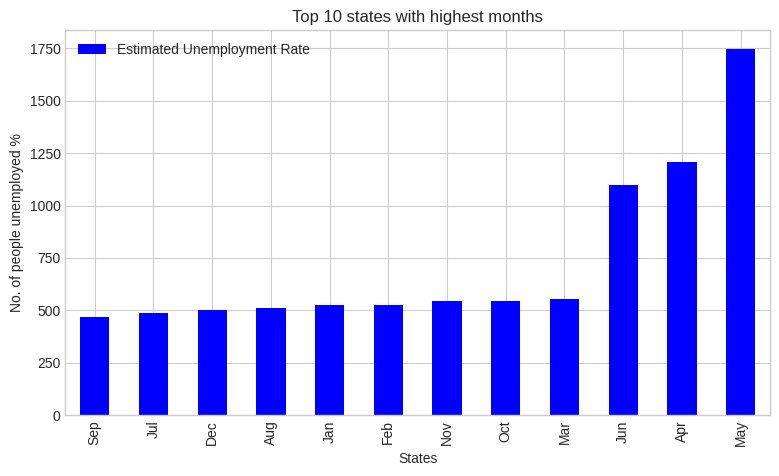

In [ ]:
import matplotlib.pyplot as plt

# Assuming 'df' is your DataFrame

# Create a new figure
fig = plt.figure()

# Add a subplot (g) to the figure. This subplot will be positioned in the first column of a 1*2 grid.
g = fig.add_subplot(1, 2, 1)

# Create a bar plot using the first 12 rows of the dataframe 'ds_2020_2'.
# The bars will be green, and the figure size is set to (20, 5)
df_2[:12].plot(kind='bar', color='blue', figsize=(20, 5), ax=g)

# Set the title for the subplot 'g'
g.set_title('Top 10 states with highest months')

# Set the label for the x-axis of the subplot 'g'
g.set_xlabel('States')

# Set the label for the y-axis of the subplot 'g'
g.set_ylabel('No. of people unemployed %')

# Display the plot
plt.show()


Text(0, 0.5, 'No. of people unemployed % ')

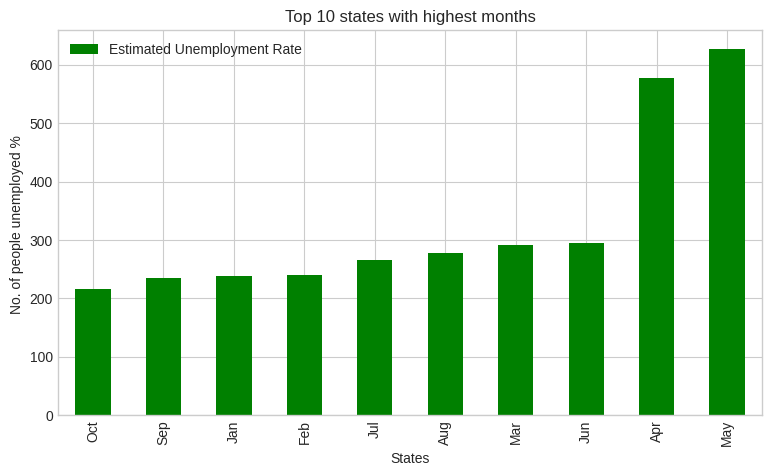

In [ ]:
fig= plt.figure()
g= fig.add_subplot(1,2,1)
ir_2[:12].plot(kind='bar', color='green', figsize=(20,5), ax=g)
g.set_title('Top 10 states with highest months')
g.set_xlabel('States')
g.set_ylabel('No. of people unemployed % ')

In [ ]:
import pandas as pd
import plotly.graph_objects as go

# Assuming 'ds_2020' DataFrame is already loaded

# Correct the typo and group by 'month', then calculate the mean
df_3 = df.groupby(['month'])[['Estimated Unemployment Rate', 'Estimated Employed', 'Estimated Labour Participation Rate']].mean()

# Reset the index to get 'month' as a column
df_3 = df_3.reset_index()

# Extract the data for plotting
month = df_3['month']
unemployment_rate = df_3['Estimated Unemployment Rate']
labour_participation_rate = df_3['Estimated Labour Participation Rate']

# Create the figure
fig = go.Figure()

# Add traces for the bar plots
fig.add_trace(go.Bar(x=month, y=unemployment_rate, name='Unemployment Rate'))
fig.add_trace(go.Bar(x=month, y=labour_participation_rate, name='Labour Participation Rate'))

# Update layout for the plot
fig.update_layout(
    title='Unemployment Rate and Labour Participation Rate',
    xaxis={
        'categoryorder': 'array',
        'categoryarray': ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec']
    },
    barmode='group'
)

# Show the plot
fig.show()


In [ ]:
import pandas as pd
import plotly.graph_objects as go

ir_3 = ir.groupby(['month'])[['Estimated Unemployment Rate', 'Estimated Employed', 'Estimated Labour Participation Rate']].mean()
ir = pd.DataFrame(ir_3).reset_index()

month = ir['month']

unemployment_rate = ir_3['Estimated Unemployment Rate']

labour_participation_rate = ir_3['Estimated Labour Participation Rate']

fig = go.Figure()

fig.add_trace(go.Bar(x=month, y=unemployment_rate, name='Unemployment Rate'))

fig.add_trace(go.Bar(x=month, y=labour_participation_rate, name='Labour Participation Rate'))

fig.update_layout(title='Unemployment Rate and Labour Participation Rate',
                  xaxis={'categoryorder': 'array',
                         'categoryarray': ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec']})
fig.show()


In [ ]:
df.columns

Index(['States', 'Date', 'Frequency', 'Estimated Unemployment Rate',
       'Estimated Employed', 'Estimated Labour Participation Rate', 'Area',
       'month_no', 'month'],
      dtype='object')

Text(0, 0.5, 'No. of Estimated Employed people')

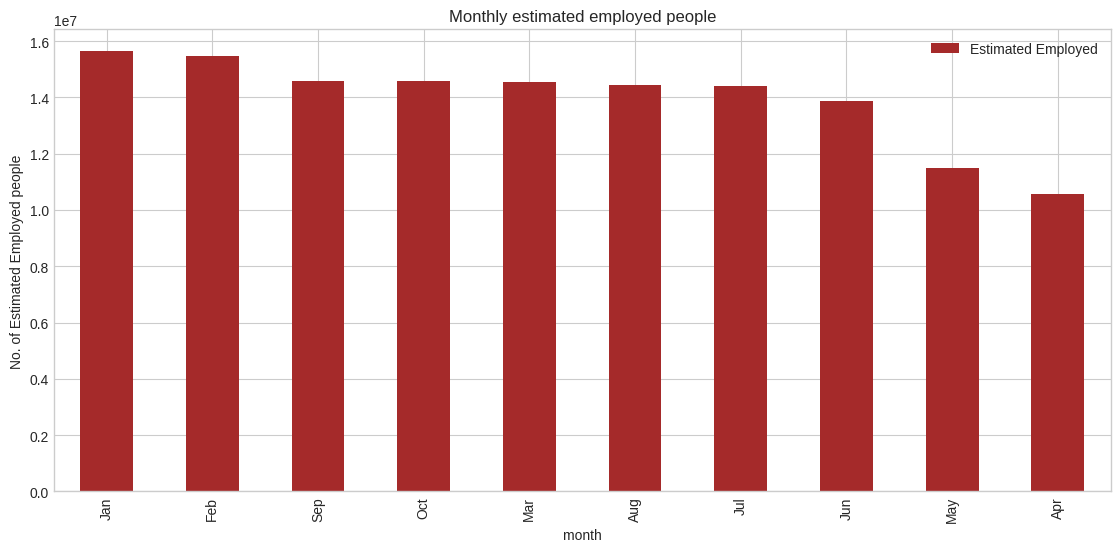

In [ ]:
# Estimated Employed month wise visualization

ir_4 = ir[['month', 'Estimated Employed']].groupby('month').sum().sort_values('Estimated Employed', ascending= False)
ir_4.head(10)
fig = plt.figure()
tt = fig.add_subplot(1,2,2)   # The second subplot (tt) will be  positioned in the second column

# Employed
ir_4[:10].plot(kind='bar', color='brown', figsize=(30,6), ax=tt)
tt.set_title('Estimated Employed people in each month')
tt.set_title('Monthly estimated employed people')
tt.set_ylabel('No. of Estimated Employed people')

Text(0, 0.5, 'No. of Estimated Employed people ')

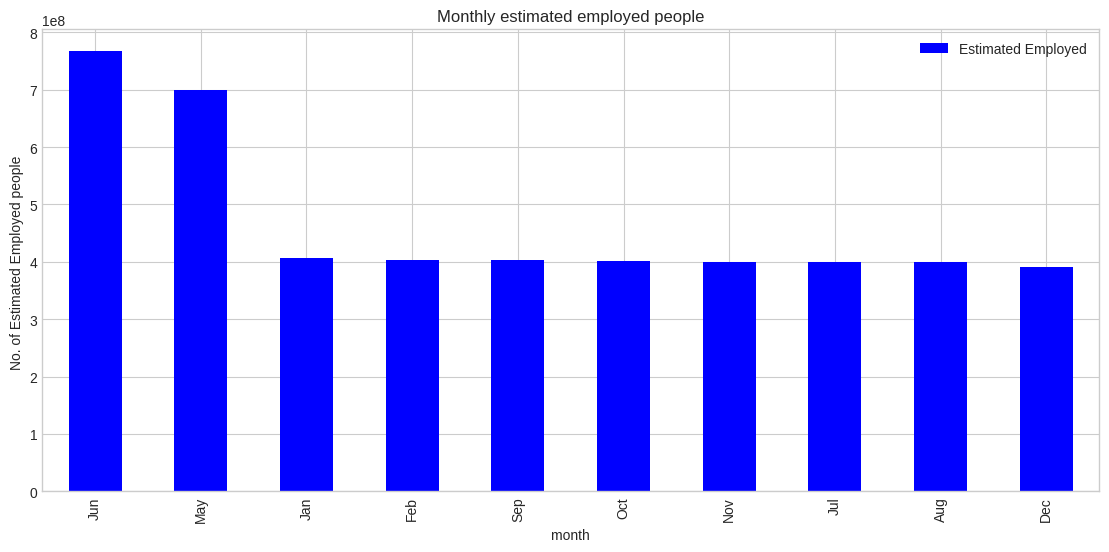

In [ ]:
# Estimated Employed month wise visualization

df_4 = df[['month', 'Estimated Employed']].groupby('month').sum().sort_values('Estimated Employed', ascending= False)
df_4.head(10)
fig = plt.figure()
tt = fig.add_subplot(1,2,2)   # The second subplot (tt) will be  positioned in the second column

# Employed
df_4[:10].plot(kind='bar', color='blue', figsize=(30,6), ax=tt)
tt.set_title('Estimated Employed people in each month')
tt.set_title('Monthly estimated employed people')
tt.set_ylabel('No. of Estimated Employed people ')

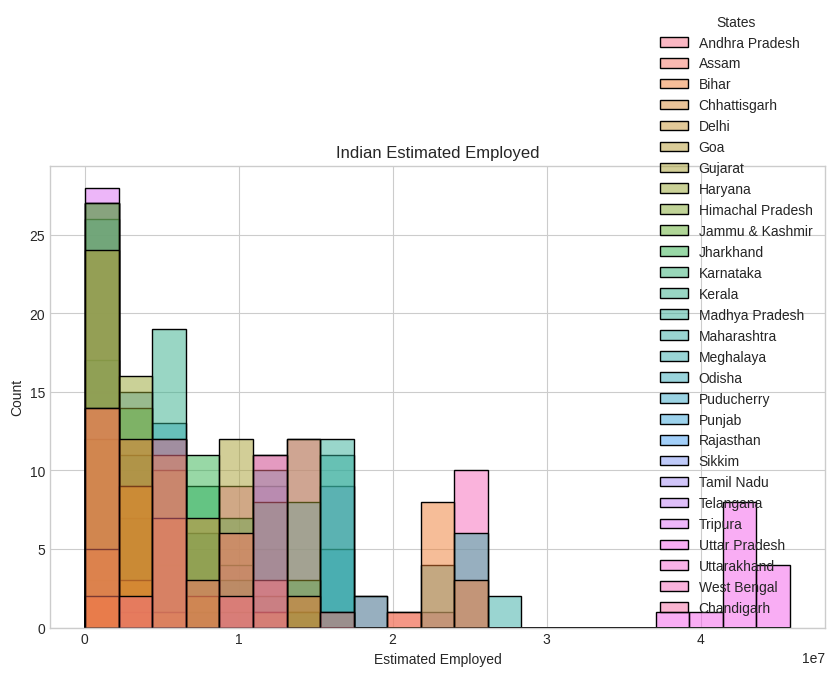

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Indian Estimated Employed
plt.figure(figsize=(10, 6))
plt.title("Indian Estimated Employed")
sns.histplot(x="Estimated Employed", hue="States", data=df)
plt.show()


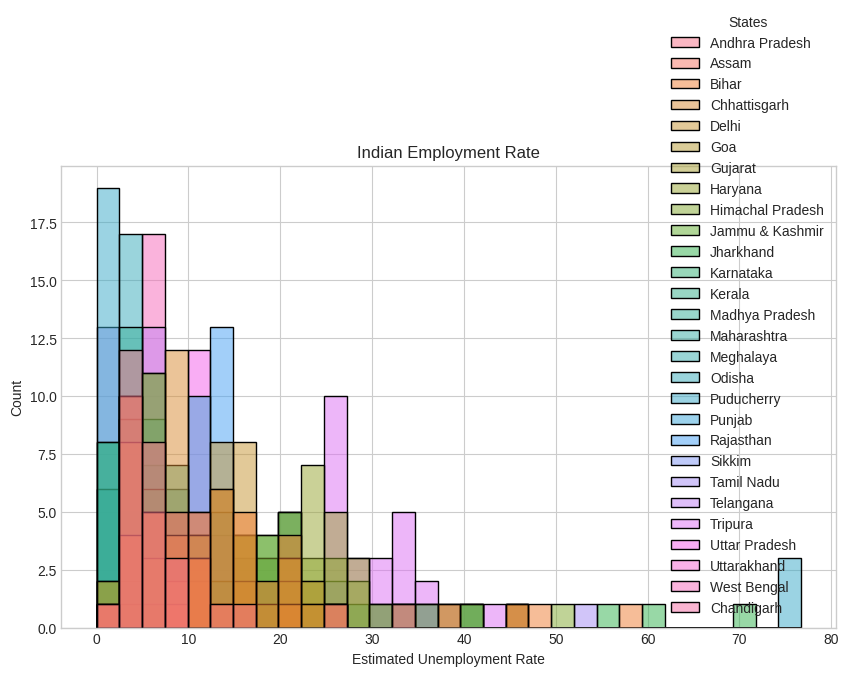

In [ ]:
# Indian Employment Rate
plt.figure(figsize=(10, 6))
plt.title("Indian Employment Rate")
sns.histplot(x="Estimated Unemployment Rate", hue="States", data=df)
plt.show()


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 740 entries, 0 to 753
Data columns (total 9 columns):
 #   Column                               Non-Null Count  Dtype         
---  ------                               --------------  -----         
 0   States                               740 non-null    object        
 1   Date                                 740 non-null    datetime64[ns]
 2   Frequency                            740 non-null    object        
 3   Estimated Unemployment Rate          740 non-null    float64       
 4   Estimated Employed                   740 non-null    float64       
 5   Estimated Labour Participation Rate  740 non-null    float64       
 6   Area                                 740 non-null    object        
 7   month_no                             740 non-null    int32         
 8   month                                740 non-null    object        
dtypes: datetime64[ns](1), float64(3), int32(1), object(4)
memory usage: 71.1+ KB


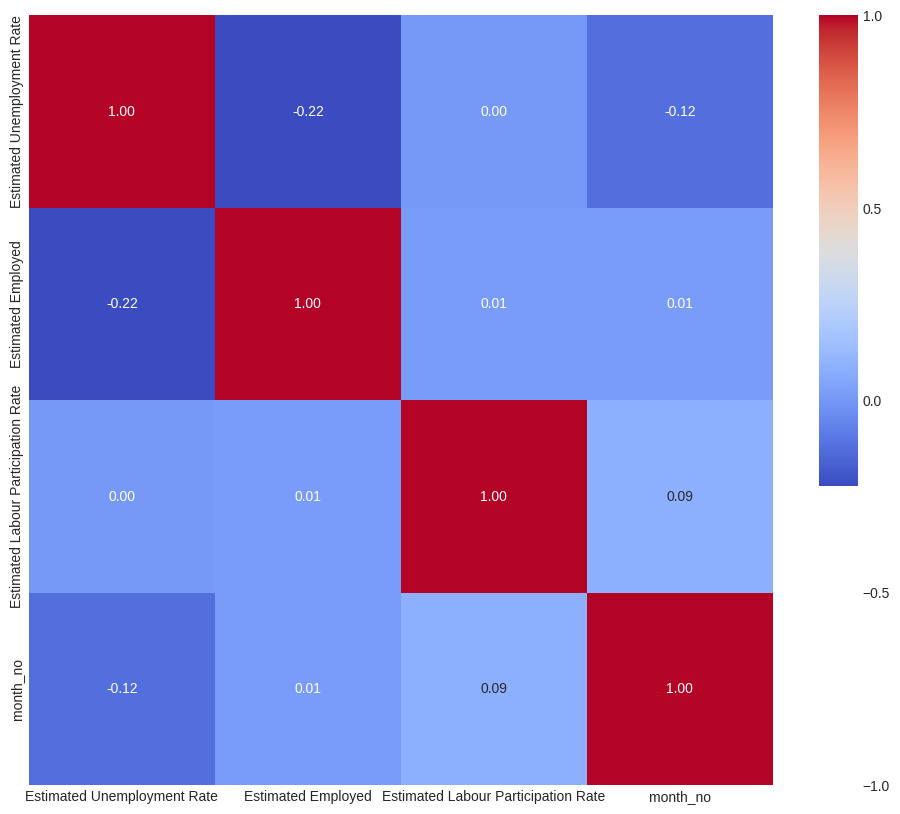

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

numerical_cols = df.select_dtypes(include=[np.number])
plt.style.use('seaborn-whitegrid')
plt.figure(figsize=(12, 10))

# Create the heatmap and annotate it
heatmap = sns.heatmap(numerical_cols.corr(), annot=True, fmt=".2f", cmap="coolwarm")

# Adjust the color bar for better visibility
cbar = heatmap.collections[0].colorbar
cbar.set_ticks([-1, -0.5, 0, 0.5, 1])  # Set the tick positions explicitly

plt.show()


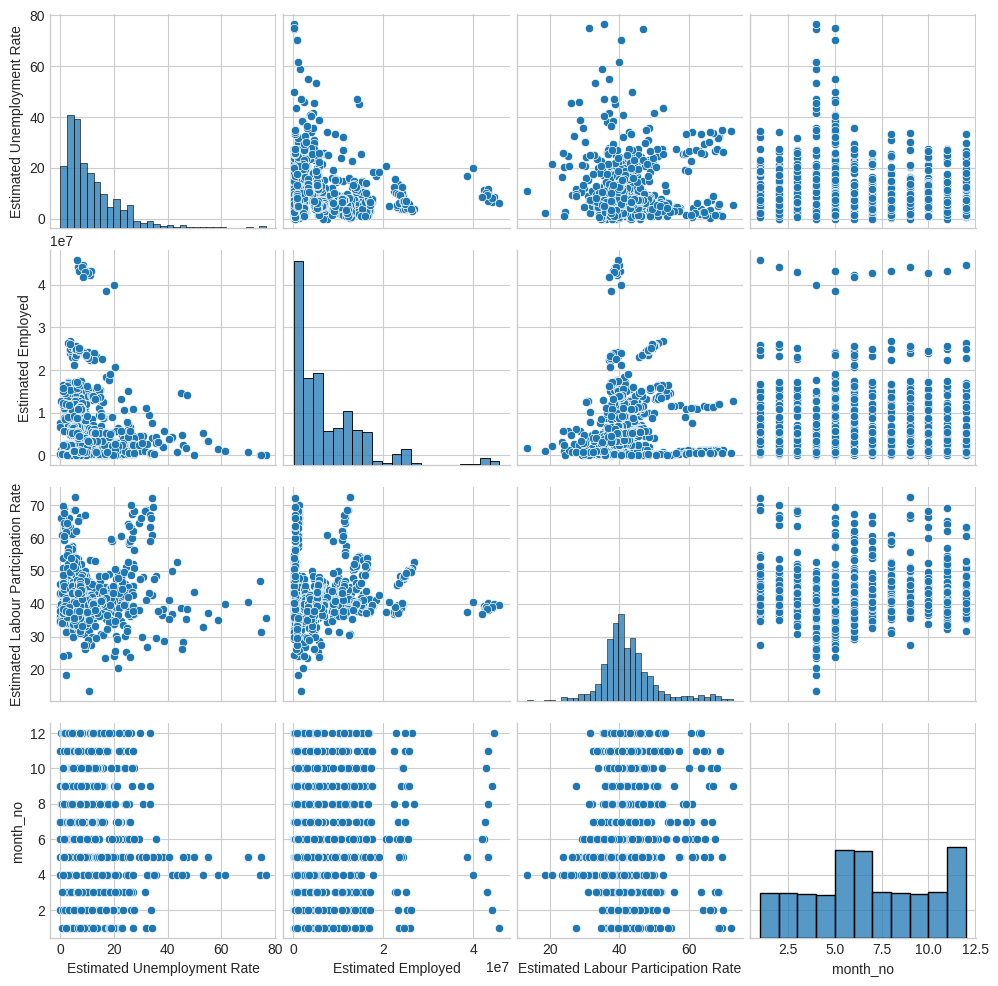

In [ ]:
sns.pairplot(df)

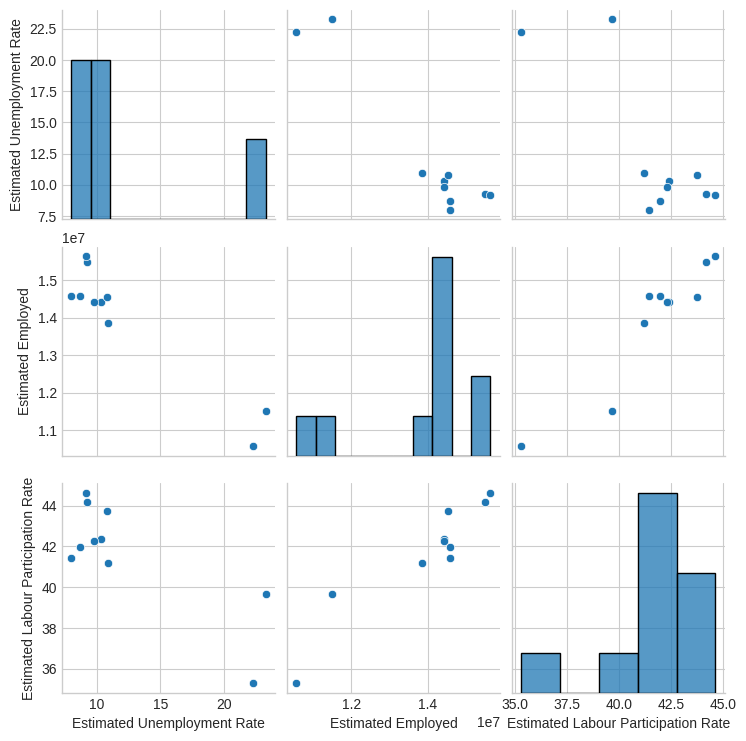

In [ ]:
sns.pairplot(ir)

In [ ]:
ir.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10 entries, 0 to 9
Data columns (total 4 columns):
 #   Column                               Non-Null Count  Dtype  
---  ------                               --------------  -----  
 0   month                                10 non-null     object 
 1   Estimated Unemployment Rate          10 non-null     float64
 2   Estimated Employed                   10 non-null     float64
 3   Estimated Labour Participation Rate  10 non-null     float64
dtypes: float64(3), object(1)
memory usage: 448.0+ bytes


In [ ]:
df

,States,Date,Frequency,Estimated Unemployment Rate,Estimated Employed,Estimated Labour Participation Rate,Area,month_no,month
0,Andhra Pradesh,2019-05-31,Monthly,3.65,11999139.0,43.24,Rural,5,May
1,Andhra Pradesh,2019-06-30,Monthly,3.05,11755881.0,42.05,Rural,6,Jun
2,Andhra Pradesh,2019-07-31,Monthly,3.75,12086707.0,43.50,Rural,7,Jul
3,Andhra Pradesh,2019-08-31,Monthly,3.32,12285693.0,43.97,Rural,8,Aug
4,Andhra Pradesh,2019-09-30,Monthly,5.17,12256762.0,44.68,Rural,9,Sep
...,...,...,...,...,...,...,...,...,...
749,West Bengal,2020-02-29,Monthly,7.55,10871168.0,44.09,Urban,2,Feb
750,West Bengal,2020-03-31,Monthly,6.67,10806105.0,43.34,Urban,3,Mar
751,West Bengal,2020-04-30,Monthly,15.63,9299466.0,41.20,Urban,4,Apr
752,West Bengal,2020-05-31,Monthly,15.22,9240903.0,40.67,Urban,5,May
